# Lab 5 – Support Vector Machines



A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, capable of performing linear and nonlinear classification, regression, and even outlier detection. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex small- or medium-sized datasets.

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [89]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)   #give random seed an int data to ensure the same data generated each time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# matplotlib uses matplotlibrc (matplotlib resource configurations) to define various properties
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
LAB_ID = "Lab5_SVM"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", LAB_ID)    # IMAGES_PATH = ./images/Lab5_SVM
os.makedirs(IMAGES_PATH, exist_ok=True)     
# To create directory; If exist_ok is False (default), an OSError occurs when the target directory already exists

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:    # tight_layout automatically adjusts the subgraph parameters to fill the entire image area
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Let's use the iris dataset to illustrate SVM. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica.

# Large margin classification

The next few code cells generate the possible decision boundaries and margin boundaries for the iris dataset.

In [90]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
#print(iris) 
#print(iris.keys())  #dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

#print(iris.feature_names)  #['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#print(iris.target_names)  #['setosa' 'versicolor' 'virginica']

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

#n_samples,n_features = X.shape
#print(X.shape)    #(150, 2)
#print(y.shape)    #(150,) 
#print(np.bincount(y))   #[50 50 50] 


setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
#print(len(X))   #100
#print(np.bincount(y))   #[50 50]  

# Support Vectors Classifier, one of SVM Classifier models 
svm_clf = SVC(kernel="linear", C=float("inf"))    # C=infinity means exact classification without soft margin problem
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In scikit-learn, algorithms in SVM library can be divided into classification and regression. SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset. Their differences can be found in https://scikit-learn.org/stable/modules/svm.html#.

Parameters of SVC. 
C: float, default=1.0. C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’. kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non-linear hyperplane.

For other parameters, see in https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

Saving figure large_margin_classification_plot


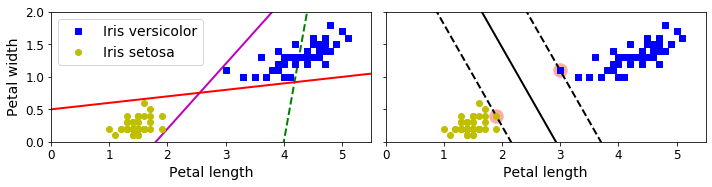

In [91]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


# SVC model
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')   
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")    #y==1: versicolor
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")      #y==0: setosa
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)     #xmin=0, xmax=5.5
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")     #fig_id=large_margin_classification_plot
plt.show()

You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. This is called large margin classification. Notice that adding more training instances "off the street" will not affect the decision boundary at all: it is fully determined (or "supported") by the instances located on the edge of the street. These instances are called the support vectors, as circled in the right plot.

# Sensitivity to feature scales

Hard-margin SVMs are sensitive to feature scales.

Saving figure sensitivity_to_feature_scales_plot


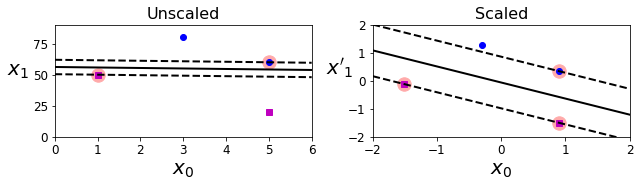

In [92]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])


#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


SVMs are sensitive to the feature scales. In the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn's StandardScaler), the decision boundary in the right plot looks much better.

# Sensitivity to outliers

If we strictly impose that all instances must be off the street and on the right side, this is called hard margin classification. There are two main issues with hard margin classification. First, it only works if the data is linearly separable. Second, it is sensitive to outliers.

Saving figure sensitivity_to_outliers_plot


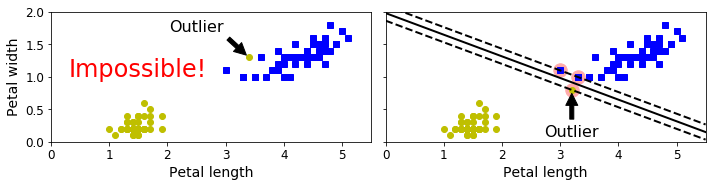

In [93]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)    #add outlier [3.4, 1.3] into Xo1
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)    #add outlier [3.2, 0.8] into Xo2
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)   # C=10 raised to the power of 9
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),    # xy, the annotated coordinate point
             xytext=(2.5, 1.7),     # xytext, the coordinate position of the annotation text
             ha="center",        # ha, horizontal alignment
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

# Soft Margin Classification

Now, we are going to allow margin violations (sample points inside the slab or misclassified ones).
We need to set the regularization hyperparameter C. Larger C leads higher accuracy in training instances and lower generalization ability. If your SVM model is overfitting, you can try regularizing it by reducing C. 

In [94]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica
# the dependent variable y chooses to be 1 for type 2, 0 for type 0 and type 1

svm_clf = Pipeline([               #use Pipeline to concatenate algorithms
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)   #fit and predict can be called directly to train and predict all algorithms in the pipeline

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [95]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Now let's generate the graph comparing different regularization settings:

In [96]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=400, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)     #Model with C=1
scaled_svm_clf2.fit(X, y)     #Model with C=400

/Users/jingqian/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=400, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [97]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

A trained LinearSVC model basically computes decision_function = w1.x1 + w2.x2 + ...+ wn.xn + b, and if decision_function ≥ 0, then the instance is classified as positive, or else it's classified as negative. x1, x2, ..., xn are the scaled input features and w1, w2, ..., wn are the corresponding weights, and b is the bias term.

It is important to scale the input features before training a support vector machine. That's why we use the StandardScaler. But if we want to plot the decision boundary of the trained LinearSVC on a plot whose axes show the original (unscaled) features, then we need to "unscale" the weights and bias term before plotting the decision boundary. In other words, once we have trained the LinearSVC, we can compute the decision function with w1.x1 + ...+ wn.xn + b, but we would like to be able to compute that same decision function as a function of the unscaled input features (let's call them x'1, x'2, ..., x'n).

So we are looking for the "unscaled" weights w'1, ..., w'n and "unscaled" bias b' such that:
decision_function = w1.x1 + w2.x2 + ...+ wn.xn + b = w'1.x'1 + w'2.x'2 + ... + w'n.x'n + b'

The standard scaler computes xi = (x'i - mean)/scale, so x'i = xi.scale + mean

Therefore:
decision_function = w1.x1 + w2.x2 + ...+ wn.xn + b
= w'1.(x1.scale + mean) + ... + w'n.(xn.scale + mean) + b'
= w'1.scale.x1 + ... + w'n.scale.xn + w'1.mean + ... + w'n.mean + b'

Looking at each input feature xi's weight, we see that: wi = w'i.scale, so w'i = wi/scale.
Moreover, by setting x1, ..., xn to zero, we see that:
b = w'1.mean + ... + w'n.mean + b'
So:
b' = - w'1.mean - ... - w'n.mean + b
= - w1.mean/ scale - ... - wn.mean/ scale + b
= decision_function(-mean/scale)

This explains:
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0]/ scaler.scale_

In [98]:
# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

The support vectors are the ones that are not "on the right side of the road". In other words, it's any positive instance whose score is <1, or any negative instance whose score is >-1. It's a linear model, the score is simply w1 x1 + w2 x2 + ... + wn xn + b, and we can compute the scores for many instances at once by computing X.dot(w) + b, where X is the input matrix and w is the weight vector. If y is the target vector, 0 for each negative instance and 1 for each positive instance, then t = 2 * y - 1 defines a new target vector, with -1 for each negative instance, and 1 for each positive instance.

We want:
X.dot(w) + b < -1 for negative instances
X.dot(w) + b > 1 for positive instances

We can rewrite this as:
-1 * X.dot(w) + b) > 1 for negative instances
+1 * X.dot(w) + b > 1 for positive instances

So this simplifies to:
t * X.dot(w) + b) > 1 for all instances
So the code just finds these instances. ravel() just reshapes the array to a one-dimensional array.

Saving figure regularization_plot


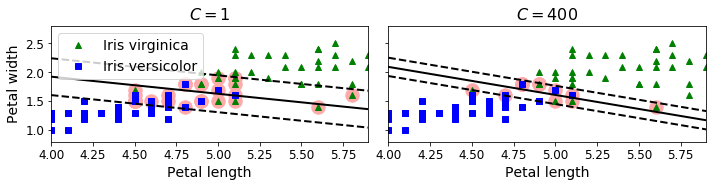

In [99]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")

plot_svc_decision_boundary1(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary1(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

# Non-linear classification

Finally, we are going to use Linear SVM classifier using polynomial features.

Saving figure higher_dimensions_plot


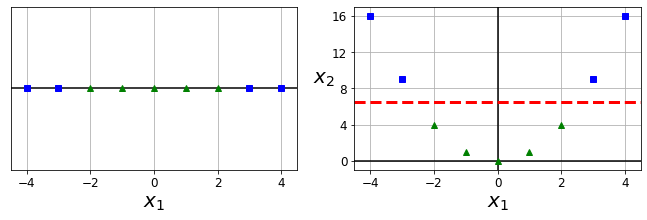

In [110]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)    #reshape(-1,1) transforms to one column
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

To implement this idea using Scikit-Learn, create a Pipeline containg a PolynomialFeatures transformer, followed by a StandardScaler and a LinearSVC. Let's test this on the moons dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles. 

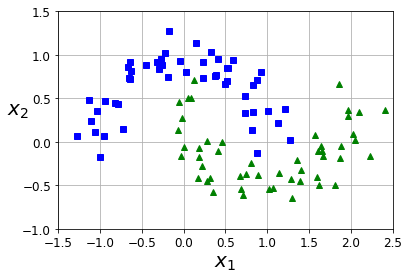

In [112]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)   #introduce Gaussian noise 

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [115]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge",random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

Saving figure moons_polynomial_svc_plot


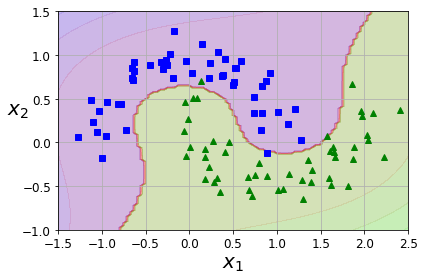

In [116]:
def plot_predictions(clf, axes):        # axes=[-1.5, 2.5, -1, 1.5]
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

This is the end of Lab 5.